In [1]:
import numpy as np

values = np.random.randint(1, 15, 75)
weights = np.random.randint(1, 15, 75)
max_weight = 300


def knapsack_fitness(candidate):
    total_value = np.sum(candidate * values)
    total_weight = np.sum(candidate * weights)
    if total_weight > max_weight:
        return total_value - (10 * (total_weight - max_weight))
    else:
        return total_value 


In [2]:
from metapy.algorithms import BinaryCatSwarmOptimization
from metapy.moving import move_binary, alter_position_binary


class KnapsackBCSO(BinaryCatSwarmOptimization):
    def init_population(self):
        population = []
        for i in range(self.population_size):
            population.append(np.random.randint(0, 2, 75))
        return population
        
    def init_velocities(self):
        velocities = []
        for i in range(self.population_size):
            velocities.append([np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)])
        return velocities
    
    def fitness(self, cat):
        return knapsack_fitness(cat)
        
    def move(self, cat, best_cat, current_velocity, velocity_factor, max_velocity):
        return move_binary(cat, best_cat, current_velocity,
                           velocity_factor, max_velocity)
    
    def alter_position(self, cat, probability_mutation_operation, count_of_dimensions_to_change):
        return alter_position_binary(cat, probability_mutation_operation,
                                     count_of_dimensions_to_change)


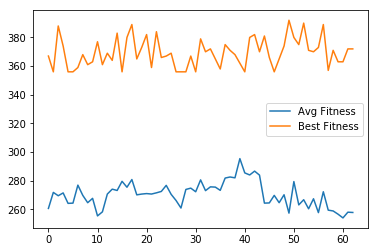

In [3]:
import matplotlib.pyplot as plt

bcso = KnapsackBCSO(mixture_ratio=0.2, 
                    seeking_memory_pool=150, 
                    probability_mutation_operation=0.8, 
                    count_of_dimensions_to_change=10, 
                    self_position_consideration=True, 
                    velocity_factor=2.0, 
                    max_velocity=[-2.0, 2.0], 
                    fitmax=15*75, 
                    fitmin=-10*15*75, 
                    population_size=50,
                    minimize=False)
bcso.optimize(max_time=60)
%matplotlib inline
plt.plot(np.arange(len(bcso.res.averaged_progress)),
         bcso.res.averaged_progress, label='Avg Fitness')
plt.plot(np.arange(len(bcso.res.best_progress)),
         bcso.res.best_progress, label='Best Fitness')
plt.legend()
plt.show()
